**_워드 임베딩?_**    
-> 텍스트를 컴퓨터가 이해할 수 있도록 수치화하는 하나의 방법   
-> 각 단어를 인공 신경망 학습을 통해 벡터화함

-----

# 1. 워드 임베딩
- 단어를 벡터로 표현하는 방법.
- 단어를 밀집 표현으로 변환

## 1.1 희소 표현(Sparse Representation) 
벡터 또는 행렬의 값이 대부분 0으로 표현되는 방법.   
ex) 원-핫 인코딩을 통해 나온 원-핫 벡터는 표현하고자 하는 단어의 인덱스만 1이고 나머지 인덱스는 전부 0으로 표현   
ex) DTM : 특정 문서에 다수 등장한 단어가 다른 많은 문서에서는 등장하지 않으면 행렬의 많은 값이 0이 된다.   
- 문제점   
    1) 단어 개수가 늘어나면 벡터의 차원이 한없이 커진다. -> 공간낭비   
    2) 단어의 의미를 표현하지 못한다.   
    3) 단어 벡터 간 유의미한 유사도를 계산할 수 없다. 
    
## 1.2 밀집 표현(Dense Representation)
사용자가 설정한 값으로 모든 단어의 벡터 표현의 차원을 맞추며, 벡터값은 0과 1만이 아니라 실수값을 갖는다.

## 1.3 워드 임베딩(Word Embedding)
단어를 밀집 벡터(dense vector)의 형태로 표현하는 방법.   
이 밀집 벡터를 워드 임베딩 과정을 통해 나온 결과라고 하여 임베딩 벡터라고도 한다.
<img src="./09-1.png">

# 2. 워드투벡터(word2Vec)
단어 벡터 간 유의미한 유사도를 파악할 수 있도록 단어의 의미를 수치화하는 대표적인 방법

### 분산 표현
희소 표현 방법의 대안으로, 단어의 의미를 다차원 공간에 벡터화하는 표현 방법.   
분포 가설을 이용하여 **텍스트를 학습**하고, 단어의 의미를 벡터의 여러 차원에 분산하여 표현.
- 분포 가설 : 비슷한 문맥에서 등장하는 단어들은 비슷한 의미를 가진다.   

분산 표현을 이용하여 단어 간 의미적 유사성을 벡터화하는 작업을 **워드 임베딩**이라 부르며, 이렇게 표현된 벡터를 **임베딩 벡터**라 한다.   

#### Word2Vec의 학습 방식에는 CBOW(Continuous Bag of Words)와 Skip-Gram 두 가지 방식이 있다.

## 1) CBOW(Continuous Bag of Words)
주변에 있는 단어들을 입력으로 중간에 있는 단어들을 예측하는 방법    
- 윈도우 : 중심 단어를 예측하기 위해서 앞, 뒤로 몇 개의 단어를 볼지에 대한 범위   
- 윈도우 크기가 n이라면, 실제 중심 단어를 예측하기 위해 참고하려고 하는 주변 단어의 개수는 2n개이다.   

투사층에서 입력 벡터인 2n개의 벡터의 평균을 구한다.
  
## 2) Skip-gram
중간에 있는 단어들을 입력으로 주변 단어들을 예측하는 방법   
중심 단어에 대해서 주변 단어를 예측하므로 투사층에서 벡터들의 평균을 구하는 과정이 없다.

**_1), 2)에 대한 추가설명은 꼭 교재 참고!!(그림이 많고 책에 나온 내용을 이해하는 게 중요해서 따로 요약X)_**
- CBOW, Skip-gram 설명 : https://wikidocs.net/22660
    
## NNLM  VS Word2Vec

<img src="./09-2.png">

### NNLM
- 단어 벡터 간 유사도를 구할 수 있도록 워드 임베딩 개념 도입
- 다음 단어를 예측하는 언어 모델 구현이 목적 -> 다음 단어를 예측
- 예측 단어의 이전 단어들만을 참고
- 활성화 함수가 있는 은닉층 존재

### Word2VEC
- 워드 임베딩 자체에 집중. NNLM의 느린 학습 속도와 정확도 개선
- 워드 임베딩 자체가 목적. -> 중심 단어를 예측
- 예측 단어의 전, 후 단어들을 모두 참고
- 활성화 함수가 있는 은닉층 제거 -> 학습 속도에 강점.

# 3. 영어/한국어 Word2Vec 실습
gensim 패키지에서 제공하는 이미 구현된 Word2Vec을 사용

## 3.1 영어 Word2Vec 만들기

### 3.1.2 훈련 데이터 전처리

In [1]:
import re
import urllib.request
import zipfile
from lxml import etree
from nltk.tokenize import word_tokenize, sent_tokenize

In [2]:
# 훈련 데이터 다운로드 - xml문서형식
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial\
/main/09.%20Word%20Embedding/dataset/ted_en-20160408.xml", filename="ted_en-20160408.xml")

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x23330969970>)

> 현재 경로로 데이터가 다운로드된다.   
\<content>, \</content> 사이의 내용들은 전처리하고, Laughter나 Applause와 같은 배경음을 나타내는 단어도 제거해야 한다.

In [3]:
# 훈련 데이터 전처리 코드
targetXML = open('ted_en-20160408.xml', 'r', encoding='UTF8')
target_text = etree.parse(targetXML)
target_text

In [4]:
# xml 파일로부터 <content>와 </content> 사이의 내용만 가져온다.
parse_text = '\n'.join(target_text.xpath('//content/text()'))

> **xpath문법 참고**
> - https://velog.io/@mjhuh263/TIL-23-HTML-XPATH-%EB%AC%B8%EB%B2%95%EA%B3%BC-selenium%EC%97%90-XPATH-%EC%9D%B4%EC%9A%A9%ED%95%98%EA%B8%B0

In [5]:
# 정규 표현식의 sub 모듈을 통해 content 중간에 등장하는 (Audio), (Laughter) 등의 배경음 부분을 제거.
# 해당 코드는 괄호로 구성된 내용을 제거.
content_text = re.sub(r'\([^)]*\)', '', parse_text)

> **re.sub 참고**
> - https://clolee.tistory.com/17

> **정규표현식 참고**
> - https://wikidocs.net/4308
> - https://uipath.tistory.com/91

In [6]:
# 입력 코퍼스에 대해서 NLTK를 이용하여 문장 토큰화를 수행.
sent_text = sent_tokenize(content_text)

# 각 문장에 대해서 구두점을 제거하고, 대문자를 소문자로 변환.
normalized_text = []
for string in sent_text:
    tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
    normalized_text.append(tokens)

# 각 문장에 대해서 NLTK를 이용하여 단어 토큰화를 수행.
result = [word_tokenize(sentence) for sentence in normalized_text]

In [7]:
print('총 샘플의 개수 : {}'.format(len(result)))

총 샘플의 개수 : 273424


In [8]:
# 샘플 3개만 출력 - 토큰화 수행되었음을 확인 가능
for line in result[:3]:
    print(line)

['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new']
['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation']
['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing']


### 3.1.2 Word2Vec 모델

In [9]:
#!pip install gensim

In [10]:
# Word2Vec 훈련시키기
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

model = Word2Vec(sentences=result, vector_size=100, window=5, min_count=5, workers=4, sg=0)

> Word2Vec의 하이퍼파라미터
> - vector_size = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원.
> - window = 컨텍스트 윈도우 크기
> - min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습X)
> - workers = 학습을 위한 프로세스 수
> - sg = 0은 CBOW, 1은 Skip-gram.

> **오류해결** : __init__() got an unexpected keyword argument 'size'
> - https://taepseon.tistory.com/165

In [11]:
# model.wv.most_similar : 입력한 단어에 대해서 가장 유사한 단어들을 출력
model_result = model.wv.most_similar("man")
print(model_result)

[('woman', 0.8594766855239868), ('guy', 0.7988778948783875), ('lady', 0.7585463523864746), ('girl', 0.7442930340766907), ('boy', 0.7347717881202698), ('gentleman', 0.706429660320282), ('poet', 0.7047451734542847), ('kid', 0.687045693397522), ('soldier', 0.687027096748352), ('surgeon', 0.6518595218658447)]


In [12]:
# Word2Vec 모델 저장하고 로드하기
model.wv.save_word2vec_format('eng_w2v') # 모델 저장
loaded_model = KeyedVectors.load_word2vec_format("eng_w2v") # 모델 로드

In [13]:
model_result = loaded_model.most_similar("man")
print(model_result)

[('woman', 0.8594766855239868), ('guy', 0.7988778948783875), ('lady', 0.7585463523864746), ('girl', 0.7442930340766907), ('boy', 0.7347717881202698), ('gentleman', 0.706429660320282), ('poet', 0.7047451734542847), ('kid', 0.687045693397522), ('soldier', 0.687027096748352), ('surgeon', 0.6518595218658447)]


## 3.2 한국어 Word2Vec 만들기(네이버 영화 리뷰)

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [15]:
# 네이버 영화 리뷰 데이터 다운로드
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master\
/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x23370804a00>)

In [16]:
train_data = pd.read_table('ratings.txt')
train_data[:5] # 상위 5개 출력

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [17]:
print(len(train_data)) # 리뷰 개수 출력

200000


In [18]:
# NULL 값 존재 유무
print(train_data.isnull().values.any())

True


In [19]:
# 결측값 제거
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인
print(len(train_data)) # 리뷰 개수 출력

False
199992


In [20]:
# 정규 표현식을 통한 한글 외 문자 제거
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data[:5] # 상위 5개 출력

C:\Users\hkny0\AppData\Local\Temp\ipykernel_10512\3523926270.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1


> str.replace의 argument에 관한 future warning   
> - The default value of regex will change from True to False in a future version.
> - https://stackoverflow.com/questions/66603854/futurewarning-the-default-value-of-regex-will-change-from-true-to-false-in-a-fu

In [21]:
## 불용어 제거
from tqdm import tqdm

# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()

tokenized_data = []
for sentence in tqdm(train_data['document']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)

100%|█████████████████████████████████████████████████████████████████████████| 199992/199992 [10:45<00:00, 309.68it/s]


> **<tqdm 사용법>**
> - 반복문에서 진행률을 progress bar로 표혀해주고 남은 시간 정보까지 알려주는 모듈
> - https://zephyrus1111.tistory.com/305

리뷰의 최대 길이 : 72
리뷰의 평균 길이 : 10.716703668146726


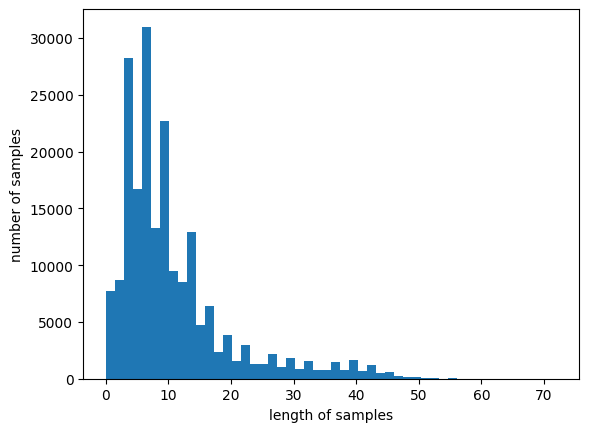

In [22]:
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :',max(len(review) for review in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(review) for review in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [23]:
# Word2Vec으로 토큰화 된 네이버 영화 리뷰 데이터를 학습
from gensim.models import Word2Vec

model2 = Word2Vec(sentences = tokenized_data, vector_size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [24]:
# 완성된 임베딩 매트릭스의 크기 확인
model2.wv.vectors.shape

(16477, 100)

In [26]:
# '최민식'과 유사한 단어 출력
print(model2.wv.most_similar("최민식"))

[('안성기', 0.8951629996299744), ('한석규', 0.878433108329773), ('김수현', 0.8374939560890198), ('엄태웅', 0.8361460566520691), ('김명민', 0.8339917063713074), ('메릴', 0.83388751745224), ('최민수', 0.8326302766799927), ('송강호', 0.8280673027038574), ('박중훈', 0.8279872536659241), ('윤제문', 0.8226507902145386)]


## 3.3 사전 훈련된 Word2Vec 임베딩(Pre-trained Word2Vec embedding) 소개
갖고 있는 훈련 데이터의 양이 부족한 상황이라면, 위키피디아 등의 방대한 데이터로 사전에 훈련된 워드 임베딩(pre-trained word embedding vector)을 가지고 와서 해당 벡터들의 값을 원하는 작업에 사용 할 수도 있다.

구글이 제공하는 사전 훈련된 Word2Vec 모델을 사용하는 방법에 대해 알아보자.   
- 모델 다운로드 경로 : https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit   


In [ ]:
import gensim
import urllib.request

# 구글의 사전 훈련된 Word2Vec 모델을 로드.
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

In [ ]:
# 모델의 크기 확인
print(word2vec_model.vectors.shape)

In [ ]:
# 두 단어의 유사도 계산 연습
print(word2vec_model.similarity('this', 'is'))
print(word2vec_model.similarity('post', 'book'))

In [ ]:
# 단어 'book'의 벡터 출력
print(word2vec_model['book'][:20])

# 4. 네거티브 샘플링을 이용한 Word2Vec 구현(Skip-Gram with Negative Sampling, SGNS)

## 4.1 네거티브 샘플링(Negative Sampling)
보통의 Word2Vec는 단어 집합의 크기가 수만 이상에 달한다면 학습하기 꽤나 무거운 모델이 된다. **네거티브 샘플링**은 Word2Vec이 학습 과정에서 전체 단어 집합이 아니라 일부 단어 집합에만 집중할 수 있도록 하는 방법. 기존의 단어 집합을 이진 분류 문제를 위한 데이터셋으로 변환한다.

## 4.2 네거티브 샘플링 Skip-Gram(Skip-Gram with Negative Sampling, SGNS)

앞서 배운 Skip-gram은 중심 단어를 입력에 사용하여, 주변 단어를 예측하는 모델이다.   
반면 네거티브 샘플링을 사용하는 Skip-gram(이하 SGNS)는 중심 단어와 주변 단어가 모두 입력이 되고, 이 두 단어가 실제로 윈도우 크기 내에 존재하는 이웃 관계인지에 대한 확률을 예측하는 모델이다.

**_추가설명은 꼭 교재 참고!!_**
- https://wikidocs.net/69141

## 4.3 20뉴스그룹 데이터 전처리하기
중심 단어, 주변 단어의 관계가 성립하기 위해 데이터는 하나의 샘플에 최소 단어 2개가 있어야 한다. 따라서 전처리 과정에서 지속적으로 이를 만족하지 않는 샘플들을 제거한다.

In [27]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.datasets import fetch_20newsgroups    # 20뉴스그룹 데이터 사용
from tensorflow.keras.preprocessing.text import Tokenizer

In [28]:
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data
print('총 샘플 수 :',len(documents))

총 샘플 수 : 11314


In [29]:
documents[0]

"Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe most pro-israeli media in the world. Having lived in Europe\nI realize that incidences such as the one described in the\nletter have occured. The U.S. media as a whole seem to try to\nignore them. The U.S. is subsidizing Israels existance and the\nEuropeans are not (at least not to the same degree). So I think\nthat might be a reason they report more clearly on the\natrocities.\n\tWhat is a shame is that in Austria, daily reports of\nthe inhuman acts commited by Israeli soldiers and the blessing\nreceived from the Government makes some of the Holocaust guilt\ngo away. After all, look how the Jews are treating other races\nwhen they got power. It is unfortunate.\n"

In [30]:
### 전처리 진행
# list -> dataframe
news_df = pd.DataFrame({'document':documents})  #document라는 열이름 사용
# 특수 문자 제거
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z]", " ")
# 길이가 3이하인 단어는 제거 (길이가 짧은 단어 제거)
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
# 전체 단어에 대한 소문자 변환
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

C:\Users\hkny0\AppData\Local\Temp\ipykernel_10512\2716589182.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z]", " ")


In [31]:
# 결측값 유무 확인
news_df.isnull().values.any()

False

In [32]:
# empty값 유무 확인 (empty값->null값변환->결측값유무 다시확인)
news_df.replace("", float("NaN"), inplace=True)
news_df.isnull().values.any()

True

In [33]:
# 결측값 제거
news_df.dropna(inplace=True)
print('총 샘플 수 :',len(news_df))

총 샘플 수 : 10995


In [34]:
# 불용어 제거
stop_words = stopwords.words('english')
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split())
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])
tokenized_doc = tokenized_doc.to_list()

In [35]:
# 단어가 1개 이하인 샘플의 인덱스를 찾아서 저장하고, 해당 샘플들은 제거.
drop_train = [index for index, sentence in enumerate(tokenized_doc) if len(sentence) <= 1]
tokenized_doc = np.delete(tokenized_doc, drop_train, axis=0)  # 행 삭제
print('총 샘플 수 :',len(tokenized_doc))

총 샘플 수 : 10940


C:\ProgramData\Anaconda3\envs\data\lib\site-packages\numpy\lib\function_base.py:5030: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


> **동일 배열 차원의 각 차원의 요소 길이가 다른 경우**
> - https://homzzang.com/b/py-311
> - https://statools.tistory.com/322

In [36]:
# 단어 집합 생성 후 정수 인코딩
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokenized_doc)

word2idx = tokenizer.word_index
idx2word = {value : key for key, value in word2idx.items()}  # dict comprehension
encoded = tokenizer.texts_to_sequences(tokenized_doc)

In [37]:
print(encoded[:2])

[[9, 59, 603, 207, 3278, 1495, 474, 702, 9470, 13686, 5533, 15227, 702, 442, 702, 70, 1148, 1095, 1036, 20294, 984, 705, 4294, 702, 217, 207, 1979, 15228, 13686, 4865, 4520, 87, 1530, 6, 52, 149, 581, 661, 4406, 4988, 4866, 1920, 755, 10668, 1102, 7837, 442, 957, 10669, 634, 51, 228, 2669, 4989, 178, 66, 222, 4521, 6066, 68, 4295], [1026, 532, 2, 60, 98, 582, 107, 800, 23, 79, 4522, 333, 7838, 864, 421, 3825, 458, 6488, 458, 2700, 4730, 333, 23, 9, 4731, 7262, 186, 310, 146, 170, 642, 1260, 107, 33568, 13, 985, 33569, 33570, 9471, 11491]]


In [38]:
# 단어 집합 크기 확인
vocab_size = len(word2idx) + 1 
print('단어 집합의 크기 :', vocab_size)

단어 집합의 크기 : 64277


## 4.4 네거티브 샘플링을 통한 데이터셋 구성하기
skipgrams 사용 : 네거티브 샘플링을 위해 케라스에서 제공하는 전처리 도구   
상위 10개의 뉴스그룹 샘플에 대해서만 수행해보자.

In [39]:
from tensorflow.keras.preprocessing.sequence import skipgrams
# 네거티브 샘플링 - 상위 10개 샘플만
skip_grams = [skipgrams(sample, vocabulary_size=vocab_size, window_size=10) for sample in encoded[:10]]

In [40]:
# 첫번째 샘플인 skip_grams[0] 내 skipgrams로 형성된 데이터셋 확인
pairs, labels = skip_grams[0][0], skip_grams[0][1]
for i in range(5):
    print("({:s} ({:d}), {:s} ({:d})) -> {:d}".format(
          idx2word[pairs[i][0]], pairs[i][0], 
          idx2word[pairs[i][1]], pairs[i][1], 
          labels[i]))

(israels (13686), media (702)) -> 1
(commited (7837), clearly (661)) -> 1
(lived (1148), seem (207)) -> 1
(shame (4988), received (634)) -> 1
(letter (705), tyndale (36628)) -> 0


In [41]:
print('전체 샘플 수 :',len(skip_grams))  # 상위10게

전체 샘플 수 : 10


In [42]:
# 첫번째 뉴스그룹 샘플에 대해서 생긴 pairs와 labels의 개수
print(len(pairs))
print(len(labels))

2220
2220


> 10개의 뉴스그룹 샘플 각각은 수많은 중심 단어, 주변 단어의 쌍으로 된 샘플들을 갖고 있다.

## 4.5 Skip-Gram with Negative Sampling(SGNS) 구현하기

In [43]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Reshape, Activation, Input
from tensorflow.keras.layers import Dot
from tensorflow.keras.utils import plot_model
from IPython.display import SVG

In [44]:
# 임베딩 벡터의 차원 : 100
embedding_dim = 100

## 임베딩 층 두 개 추가

# 1) 중심 단어를 위한 임베딩 테이블
w_inputs = Input(shape=(1, ), dtype='int32')
word_embedding = Embedding(vocab_size, embedding_dim)(w_inputs)

# 2) 주변 단어를 위한 임베딩 테이블
c_inputs = Input(shape=(1, ), dtype='int32')
context_embedding  = Embedding(vocab_size, embedding_dim)(c_inputs)

각 단어는 임베딩 테이블을 거쳐서 내적을 수행하고, 내적의 결과는 1 또는 0을 예측하기 위해서 시그모이드 함수를 활성화 함수로 거쳐 최종 예측값을 얻는다.

In [45]:
dot_product = Dot(axes=2)([word_embedding, context_embedding])
dot_product = Reshape((1,), input_shape=(1, 1))(dot_product)
output = Activation('sigmoid')(dot_product)

# 모델 생성
model = Model(inputs=[w_inputs, c_inputs], outputs=output)
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam')
plot_model(model, to_file='model3.png', show_shapes=True, show_layer_names=True, rankdir='TB')

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding (Embedding)          (None, 1, 100)       6427700     ['input_1[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, 1, 100)       6427700     ['input_2[0][0]']                
                                                                                              

In [46]:
# 모델 학습 : 5 epoch
for epoch in range(1, 6):
    loss = 0
    for _, elem in enumerate(skip_grams):
        first_elem = np.array(list(zip(*elem[0]))[0], dtype='int32')
        second_elem = np.array(list(zip(*elem[0]))[1], dtype='int32')
        labels = np.array(elem[1], dtype='int32')
        X = [first_elem, second_elem]
        Y = labels
        loss += model.train_on_batch(X,Y)  
    print('Epoch :',epoch, 'Loss :',loss)

Epoch : 1 Loss : 6.931175768375397
Epoch : 2 Loss : 6.906608879566193
Epoch : 3 Loss : 6.881051659584045
Epoch : 4 Loss : 6.850699603557587
Epoch : 5 Loss : 6.813078224658966


## 4.6 결과 확인하기

In [47]:
import gensim

# 학습된 임베딩 벡터들을 저장
f = open('vectors.txt' ,'w')
f.write('{} {}\n'.format(vocab_size-1, embed_size))
vectors = model.get_weights()[0]
for word, i in tokenizer.word_index.items():
    f.write('{} {}\n'.format(word, ' '.join(map(str, list(vectors[i, :])))))
f.close()

# 모델 로드
w2v = gensim.models.KeyedVectors.load_word2vec_format('./vectors.txt', binary=False)

NameError: name 'embed_size' is not defined

> **Question2.**
> - name 'embed_size' is not defined...
> - embed_size 아니고 embedding_dim인 것 같은데 확실하지가 않다...ㅠㅠ

> 질문함ㅋㅋ   
> 마지막 6. 결과 확인하기 부분의 코드 중 
f.write('{} {}\n'.format(vocab_size-1, embed_size)) 라는 코드에서 
embed_size라는 변수가 앞에서 지정되어 있지 않아서 오류가 납니다.
이 embed_size가 혹시 앞에서 지정한 임베딩 벡터의 차원인 embedding_dim을 잘 못 쓴 것일까요?

In [ ]:
w2v.most_similar(positive=['soldiers'])

In [ ]:
w2v.most_similar(positive=['doctor'])

In [ ]:
w2v.most_similar(positive=['police'])

# 5. 글로브(GloVe)
* LSA : 카운트 기반
    - 장) 코퍼스의 전체적인 통계 정보 고려
    - 단) 단어 의미의 유추 작업에 불리
* Word2Vec : 예측 기반
    - 장) 단어 간 유추 작업에 유리
    - 단) 코퍼스의 전체적인 통계 정보 반영 X


* **글로브** : 카운트 기반(ex. LSA)과 예측 기반(ex. Word2Vec)을 모두 사용하는 방법론   
    - Word2Vec만큼 뛰어난 성능을 보여주므로, 실제로 두 가지 모두 사용해보고 성능이 더 좋은 것을 사용하는 게 바람직하다.


## 윈도우 기반 동시 등장 행렬, 동시 등장 확률, 손실 함수
GloVe의 목표는 **임베딩 된 중심 단어와 주변 단어 벡터의 내적이 전체 코퍼스에서의 동시 등장 확률이 되도록 임베딩 벡터를 만드는 것**이다!!

**추가설명은 꼭꼭꼭 교재 참고!!**
- https://wikidocs.net/22885

## 5.2 GloVe 훈련시키기

In [59]:
!pip install glove-python-binary

ERROR: Could not find a version that satisfies the requirement glove-python-binary (from versions: none)
ERROR: No matching distribution found for glove-python-binary


> **Question3.**   
설치가 안돼여... 실습 못해여...ㅠㅅㅠ

In [58]:
from glove import Corpus, Glove

corpus = Corpus() 

# 훈련 데이터로부터 GloVe에서 사용할 동시 등장 행렬 생성
corpus.fit(result, window=5)
glove = Glove(no_components=100, learning_rate=0.05)

# 학습하기 : 학습에 이용할 쓰레드의 개수는 4로 설정, 에포크는 20.
glove.fit(corpus.matrix, epochs=20, no_threads=4, verbose=True)
glove.add_dictionary(corpus.dictionary)

ModuleNotFoundError: No module named 'glove'

In [ ]:
print(glove.most_similar("man"))

In [ ]:
print(glove.most_similar("boy"))

In [ ]:
print(glove.most_similar("university"))

# 6. 패스트텍스트(FastText)
Word2Vec를 확장한 메커니즘이지만, Word2Vec는 단어를 쪼개질 수 없는 단위로 생각한다면, FastText는 하나의 단어 안에도 여러 단어들이 존재하는 것으로 간주한다는 차이가 있다.   
다시 말해, FastText는 내부 단어, 즉 서브워드(subword)를 고려하여 학습한다.

## 6.1 내부 단어(subword)의 학습
FastText에서는 각 단어를 글자 단위 n-gram의 구성으로 취급한다.   
ex) n=3. 즉, 트라이그램(tri-gram)이고, 단어는 apple이라면   
내부 단어 토큰은 \<apple>에서 <ap, app, ppl, ple, le>로 5개이고, 여기에 기본적으로 <apple>을 추가해 총 6개의 토큰을 벡터화한다.

## 6.2 모르는 단어(Out Of Vocabulary, OOV)에 대한 대응
FastText의 인공 신경망을 학습한 후에는 데이터 셋의 모든 단어의 각 n-gram에 대해서 워드 임베딩이 된다. 이것의 장점은 **내부 단어(Subword)를 통해 모르는 단어(Out Of Vocabulary, OOV)에 대해서도 다른 단어와의 유사도를 계산할 수 있다는 점**이다.

## 6.3 단어 집합 내 빈도 수가 적었던 단어(Rare Word)에 대한 대응
등장 빈도 수가 적은 단어(rare word)에 대해서는 임베딩의 정확도가 높지 않은 Word2Vec와 달리, FastText의 경우, 만약 단어가 희귀 단어라도, **그 단어의 n-gram이 다른 단어의 n-gram과 겹치는 경우**라면, Word2Vec과 비교하여 비교적 높은 임베딩 벡터값을 얻는다. 또한 같은 이유로, 노이즈(오타)가 많은 코퍼스에서 강점을 갖는다.

## 6.4 실습으로 비교하는 Word2Vec Vs. FastText

In [ ]:
# 1) Word2Vec
model.wv.most_similar("electrofishing")

> 오류남. 즉 Word2Vec는 모르는 단어에 대해서는 임베딩 벡터가 존재하지 않으므로 단어의 유사도를 계산할 수 없다.

In [ ]:
# 2) FastText
from gensim.models import FastText

model = FastText(result, size=100, window=5, min_count=5, workers=4, sg=1)

model.wv.most_similar("electrofishing")   # 유사한 단어를 계산해서 출력함

## 6.5 한국어에서의 FastText
OOV 문제를 해결하기 위한 시도

### 1) 음절 단위
음절 단위의 임베딩의 경우에 n=3일때 ‘자연어처리’라는 단어에 대해 n-gram을 만들어보면 다음과 같다.
* **<자연, 자연어, 연어처, 어처리, 처리>**

### 2) 자모 단위(초성, 중성, 종성 단위)
오타나 노이즈 측면에서 더 강한 임베딩을 기대해볼 수 있다.   
‘자연어처리’라는 단어에 대해서 초성, 중성, 종성을 분리하고, 만약, 종성이 존재하지 않는다면 ‘\_’라는 토큰을 사용한다고 가정한다면 ‘자연어처리’라는 단어는 아래와 같이 분리가 가능하며, 분리된 결과의 대한 tri-gram 적용 결과는 다음과 같다.
* 분리된 결과 : ㅈ ㅏ _ ㅇ ㅕ ㄴ ㅇ ㅓ _ ㅊ ㅓ _ ㄹ ㅣ _
* < ㅈ ㅏ, ㅈ ㅏ \_, ㅏ _ ㅇ, ... 중략>

# 7. 자모 단위 한국어 FastText 학습하기
-> 웹사이트에서 비공개 처리됨.

# 8. 사전 훈련된 워드 임베딩(Pre-trained Word Embedding)